In [1]:
import numpy as np
import matplotlib.pyplot as plt
from layer import DenseLayer
from dnn import DenseNeuralNetwork

from mnist_loader import load_data, load_data_wrapper

In [2]:
np.random.seed(42)

INPUT_SIZE = 784
HIDDEN_SIZE = (128, 128)
OUTPUT_SIZE = 10 

n_epochs = 20

In [3]:
(training_data, validation_data, test_data) = load_data()
X_train, y_train = training_data
X_test, y_test = test_data
X_val, y_val = validation_data

In [4]:
dnn = DenseNeuralNetwork(input_size=INPUT_SIZE, output_size=OUTPUT_SIZE, hidden_size=HIDDEN_SIZE)
dnn.fit(X_train, y_train, X_val, y_val, init_lr = 0.001, decay = 0.001, n_epochs = n_epochs, batch_size=256)

Epoch: 0 || Loss: 0.04670 || Training Acc: 87.30% || Validation Acc: 92.51%
Epoch: 1 || Loss: 0.02164 || Training Acc: 94.24% || Validation Acc: 95.34%
Epoch: 2 || Loss: 0.01698 || Training Acc: 95.54% || Validation Acc: 95.99%
Epoch: 3 || Loss: 0.01436 || Training Acc: 96.31% || Validation Acc: 96.44%
Epoch: 4 || Loss: 0.01259 || Training Acc: 96.79% || Validation Acc: 96.78%
Epoch: 5 || Loss: 0.01136 || Training Acc: 97.19% || Validation Acc: 96.62%
Epoch: 6 || Loss: 0.01031 || Training Acc: 97.52% || Validation Acc: 96.75%
Epoch: 7 || Loss: 0.00964 || Training Acc: 97.68% || Validation Acc: 96.92%
Epoch: 8 || Loss: 0.00895 || Training Acc: 97.94% || Validation Acc: 96.98%
Epoch: 9 || Loss: 0.00839 || Training Acc: 98.07% || Validation Acc: 97.27%
Epoch: 10 || Loss: 0.00800 || Training Acc: 98.20% || Validation Acc: 97.40%
Epoch: 11 || Loss: 0.00760 || Training Acc: 98.29% || Validation Acc: 97.09%
Epoch: 12 || Loss: 0.00715 || Training Acc: 98.43% || Validation Acc: 97.35%
Epoch: 13

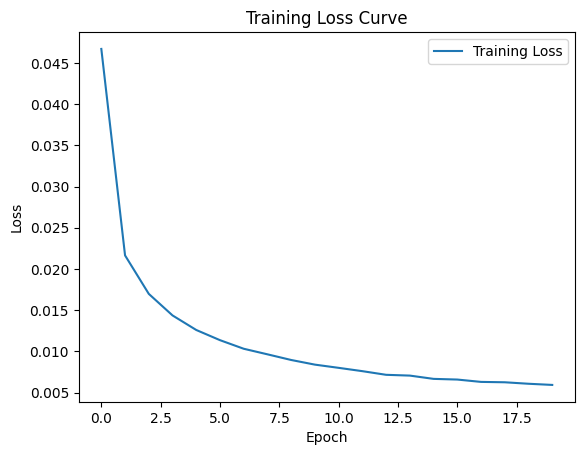

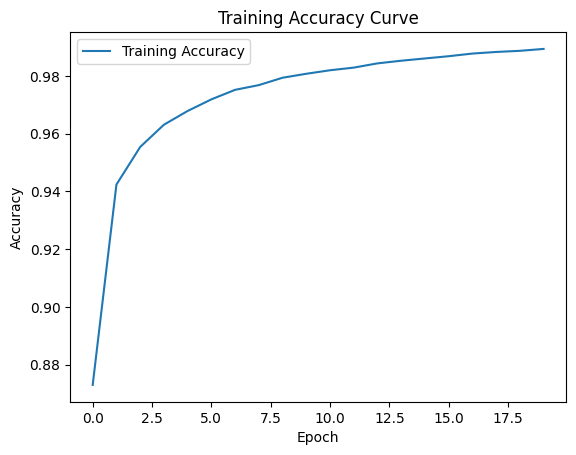

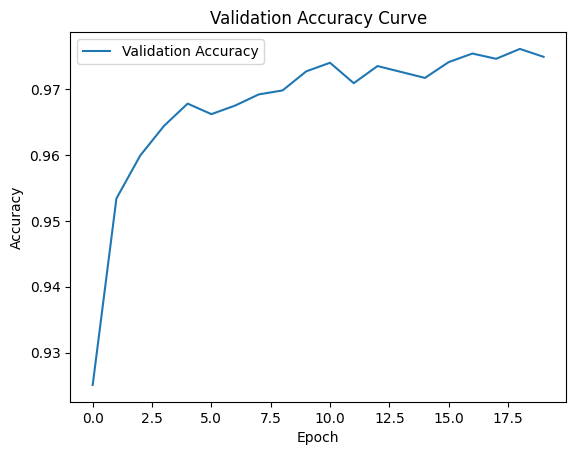

In [5]:
plt.plot(range(n_epochs), dnn.loss_log, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

plt.plot(range(n_epochs), dnn.train_acc_log, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Curve')
plt.legend()
plt.show()

plt.plot(range(n_epochs), dnn.val_acc_log, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Curve')
plt.legend()
plt.show()

In [6]:
test_preds = dnn.predict(X_test)
test_acc = np.mean(y_test == test_preds)
print(f"Test accuracy: {test_acc * 100:.2f}%")

Test accuracy: 97.43%


In [ ]:
hidden_sizes = [64, 128, 256, 512]
batch_sizes = [32, 64, 128, 256]

n_epochs_tuning = 30

In [ ]:
%%capture cap

for h in hidden_sizes:
    for b in batch_sizes:
        print("-----------------------------------------")
        print(f"Hidden layer size: {h} || Batch_size: {b}")
        print("-----------------------------------------")
        dnn = DenseNeuralNetwork(input_size=INPUT_SIZE, output_size=OUTPUT_SIZE, hidden_size=h)
        dnn.fit(X_train, y_train, X_val, y_val, init_lr = 0.001, decay = 0.001, n_epochs = n_epochs_tuning, batch_size=b)
        print("-----------------------------------------")

with open('output.txt', 'w') as file:
    file.write(cap.stdout)